<img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">
# 01 - Thinking Statistically (25min)

## Table of Contents

1. [Introduction](#introduction)
2. [Correlations](#correlations)
3. [Classifiers](#classifiers)
2. [Damn and `BLAST`](#blast)

<a id="introduction"></a>
## 1. Introduction

<p></p><div class="alert-success">
<b>in this notebook, we will consider practical examples in three topics often found in modern biology where *statistical thinking* can help you avoid common mistakes that can potentially undermine your research.</b>
</div>

Modern biology is increasingly quantitative. Next-generation sequencing data is increasingly important and ubiquitous. Large-scale sampling and image acquisition are more frequent drivers of experimental understanding of systems. A greater proportion of practical biology - and especially computational biology - now involves managing, integrating and, above all, *understanding* larger datasets than have previously been available to biologists.

Large datasets have different properties to small datasets, and this can easily lead the unwary astray. Developing an intuition for the properties of large datasets is more important than ever.

<a id="correlations"></a>
## 2. Correlations (10min)

### Biological motivation

You have been given a dataset of transcript levels (e.g. RNAseq, microarray, qRT-PCR) for two genes in your organism of interest. These transcript levels have been measured over 11 timepoints. You would like to know whether those genes are coregulated or not.

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>How can you determine whether two genes are coregulated from transcript data?</b>
<p></p>
<b>What is the distinction between coregulation and <i>correlated expression</i>?</b>
</div>

### Dataset

<p></p><div class="alert-success">
<b>The `Code` cell below contains Python code that will load your dataset.</b>
</div>

You will have been assigned a letter: **A**, **B**, **C**, or **D** as part of the workshop. Please enter this letter in the first line of Python code, so that you are working with the appropriate dataset:

```python
# Define your group, for this exercise
mygroup = "A"  # <- change the letter in quotes
```

and then ***execute the cell*** with `Ctrl-Enter` or `Shift-Enter`. This will load the exercise data into a *variable* called `expn`.

In [6]:
# Define your group, for this exercise
mygroup = "A"  # <- change the letter in quotes

# Import Python libraries
import os               # This lets us interact with the operating system
import pandas as pd     # This allows us to use dataframes
import seaborn as sns   # This gives us pretty graphics options

# Load the data
datafile = os.path.join('data', 'correlations', mygroup, 'expn.tab')
data = pd.read_csv(datafile, sep="\t")

# Show the first few lines of the data
data.head()

,gene1,gene2
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


After executing the `code` cell, you should see a table of values. The table has columns named **gene1** and **gene2**, and rows that are *indexed* starting at zero (it is typical in many programming languages to start counting at zero).

### Summary statistics

<p></p><div class="alert-success">
<b>It is always useful to get a quantitative overview of a new dataset by looking at some *bulk statistics*: the dataset's *mean*, *median*, *variance*, *standard deviation*, and minimum and maximum values.</b>
</div>

The data you loaded is in a `dataframe` (this behaves very much like `dataframe`s in the `R` language), and you can obtain summary statistics quite readily using the `.describe()` *method*.

```python
# Show summary statistics of the dataframe
data.describe()
```

<p></p><div class="alert-danger">
<b>Use the `.describe()` method to obtain summary statistics for your data in the cell below</b>
</div>

In [8]:
# Show summary statistics of the dataframe
data.describe()

,gene1,gene2
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


### Correlations

<p></p><div class="alert-success">
<b>We have decided that, as a way of identifying potentially coregulated genes, we will lok for *correlated expression* between `gene1` and `gene2`</b>
</div>

The `dataframe` provides another *method* that reports the (Pearson) correlation coefficient between the columns of the dataset:

```python
# Show the Pearson correlation coefficients between columns in the dataset
data.corr()
```

<p></p><div class="alert-danger">
<b>Use the `.corr()` method to obtain summary statistics for your data in the cell below</b>
</div>

In [10]:
# Show the Pearson correlation coefficients between columns in the dataset
data.corr()

,gene1,gene2
gene1,1.000000,0.816421
gene2,0.816421,1.000000


You now have an estimate of whether these two genes are likely to be coregulated.

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>How strong do you think the evidence is that these two genes are coregulated?</b>
</div>

### Visualising Data

<p></p><div class="alert-success">
<bIn addition to summary statistics, it is always useful to *visualise* your data, to inspect it for patterns and potential outliers, and to see whether it makes intuitive sense.</b>
</div>

The `dataframe` provides a group of methods that allow us to plot the data for **gene1** and **gene2** in various ways. You will use the `.plot.scatter()` method in the cell below to visualise the way in which their transcript levels vary together.

<p></p><div class="alert-danger">
<b>Use the `.plot.scatter()` method to visualise your data in the cell below</b>
</div>

Populating the interactive namespace from numpy and matplotlib


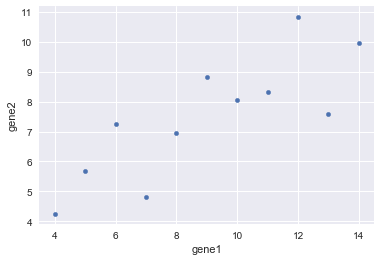

In [19]:
# The line below allows plots to be rendered in the notebook
# This is very useful for literate programming, and for producing reports
%pylab inline

# Show a scatter plot of transcript levels for gene1 and gene2
data.plot.scatter('gene1', 'gene2');

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>How strong do you think the evidence is that these two genes are coregulated?</b>
</div>

### Conclusions

#### 1. Always Visualise Your Data

Although your summary statistics looked promising (strong Pearson correlation coefficient), in some cases you will have seen that this single *point value* was misleading. You should always try to visualise your data in an appropriate way, so that you are not led astray by a single simple statstic (such as a *P*-value).

#### 2. Correlation Does Not Imply Causation

![Divorce rate in Maine correlates with *per capita* margarine consumption](images/divorce_margarine.png)

This relationship has Pearson correlation coefficient of [**0.993**](http://tylervigen.com/view_correlation?id=1703)

#### 3. In a Large Dataset, If You Look For Anything, You Will Find Something

![Anyone cna do a PCA with fluorescent colors and make it look meaningful](images/twitter_pca.png)